In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
tf.__version__

'2.1.0'

In [2]:
image = tf.keras.preprocessing.image.load_img(r'covid_dataset/train/covid/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg' , target_size=(224,224))

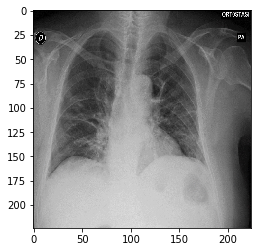

In [4]:
plt.imshow(image);

In [5]:
image = tf.keras.preprocessing.image.load_img(r'covid_dataset/train/normal/NORMAL2-IM-1310-0001.jpeg' , target_size=(224,224))

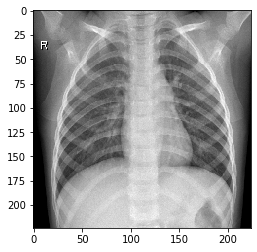

In [6]:
plt.imshow(image);

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input 
                                  , rotation_range = 50 , width_shift_range = 0.2 , 
                                  height_shift_range = 0.2 ,
                                  zoom_range = 0.1, horizontal_flip = True , 
                                  vertical_flip = True)

In [10]:
train_generator = train_datagen.flow_from_directory('covid_dataset/train' , 
                                                   target_size = (224,224) ,
                                                   batch_size = 16 , 
                                                   class_mode = 'categorical', 
                                                   shuffle = True)


Found 130 images belonging to 2 classes.


In [11]:
train_generator.n

130

In [12]:
train_generator.batch_size

16

In [13]:
step_size_train = train_generator.n // train_generator.batch_size

In [14]:
step_size_train

8

In [15]:
test_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input)

In [51]:
test_generator = test_datagen.flow_from_directory('covid_dataset/test' , 
                                                   target_size = (224,224) ,
                                                   batch_size = 1 , 
                                                   class_mode = 'categorical', 
                                                   shuffle = False)

Found 18 images belonging to 2 classes.


In [52]:
step_size_test = test_generator.n // test_generator.batch_size
step_size_test

18

In [20]:
base_model = tf.keras.applications.ResNet50(weights='imagenet' , include_top = False)

94773248/94765736 [==============================] - 38s 0us/step


In [21]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [30]:
x = base_model.output

In [31]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [32]:
x = tf.keras.layers.Dense(1024 , activation = 'relu')(x)
x = tf.keras.layers.Dense(1024 , activation = 'relu')(x)
x = tf.keras.layers.Dense(512 , activation = 'relu')(x)
preds = tf.keras.layers.Dense(2 , activation = 'softmax')(x)

In [33]:
model = tf.keras.Model(inputs  = base_model.input , outputs = preds)

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [36]:
for i , layer in enumerate(model.layers):
    print(i , layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [37]:
for layer in model.layers[:175]:
    layer.trainable = False    

In [38]:
for layer in model.layers[175:]:
    layer.trainable = True

In [39]:
model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [53]:
history = model.fit_generator(generator = train_generator , epochs = 20
                             , steps_per_epoch = step_size_train , 
                              validation_data = test_generator , 
                             validation_steps = step_size_test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 18 steps
Epoch 1/20
8/8 [==============================] - 15s 2s/step - loss: 0.1051 - accuracy: 0.9825 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 18s 2s/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 17s 2s/step - loss: 0.0899 - accuracy: 0.9561 - val_loss: 0.1792 - val_accuracy: 0.9444
Epoch 4/20
8/8 [==============================] - 18s 2s/step - loss: 0.3282 - accuracy: 0.9211 - val_loss: 1.5614 - val_accuracy: 0.6667
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 0.6983 - accuracy: 0.7456 - val_loss: 0.3111 - val_accuracy: 0.8333
Epoch 6/20
8/8 [==============================] - 18s 2s/step - loss: 0.2540 - accuracy: 0.9062 - val_loss: 0.1737 - val_accuracy: 0.9444
Epoch 7/20
8/8 [==============================] - 18s 2s/step - loss: 0.1607 - ac

In [54]:
history.history['val_accuracy']

[1.0,
 1.0,
 0.9444444,
 0.6666667,
 0.8333333,
 0.9444444,
 0.9444444,
 1.0,
 0.8888889,
 0.9444444,
 1.0,
 0.8888889,
 0.9444444,
 1.0,
 0.8333333,
 1.0,
 1.0,
 0.8888889,
 0.9444444,
 1.0]

In [55]:
np.mean(history.history['val_accuracy'])

0.9333333

In [56]:
np.std(history.history['val_accuracy'])

0.08164965

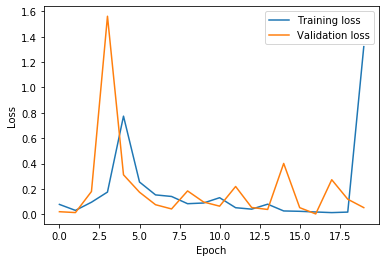

In [57]:
plt.plot(history.history['loss'] , label = 'Training loss')
plt.plot(history.history['val_loss'] , label = 'Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend();

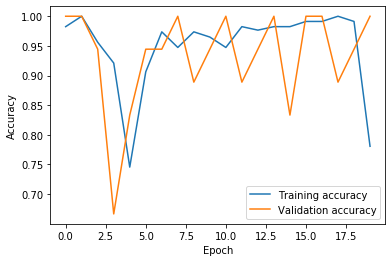

In [58]:
plt.plot(history.history['accuracy'] , label = 'Training accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend();


In [59]:
filenames = test_generator.filenames
filenames

['covid/nejmoa2001191_f3-PA.jpeg',
 'covid/nejmoa2001191_f4.jpeg',
 'covid/nejmoa2001191_f5-PA.jpeg',
 'covid/radiol.2020200490.fig3.jpeg',
 'covid/ryct.2020200028.fig1a.jpeg',
 'covid/ryct.2020200034.fig2.jpeg',
 'covid/ryct.2020200034.fig5-day0.jpeg',
 'covid/ryct.2020200034.fig5-day4.jpeg',
 'covid/ryct.2020200034.fig5-day7.jpeg',
 'normal/NORMAL2-IM-1385-0001.jpeg',
 'normal/NORMAL2-IM-1396-0001.jpeg',
 'normal/NORMAL2-IM-1400-0001.jpeg',
 'normal/NORMAL2-IM-1401-0001.jpeg',
 'normal/NORMAL2-IM-1406-0001.jpeg',
 'normal/NORMAL2-IM-1412-0001.jpeg',
 'normal/NORMAL2-IM-1419-0001.jpeg',
 'normal/NORMAL2-IM-1422-0001.jpeg',
 'normal/NORMAL2-IM-1423-0001.jpeg']

In [60]:
len(filenames)

18

In [61]:
predictions = model.predict_generator(test_generator , steps = len(filenames))

Instructions for updating:
Please use Model.predict, which supports generators.


In [62]:
predictions

array([[9.6851617e-01, 3.1483836e-02],
       [8.9903301e-01, 1.0096700e-01],
       [7.7929074e-01, 2.2070923e-01],
       [9.4916785e-01, 5.0832164e-02],
       [9.0923131e-01, 9.0768695e-02],
       [9.7977442e-01, 2.0225557e-02],
       [9.9959022e-01, 4.0981628e-04],
       [9.4381046e-01, 5.6189544e-02],
       [9.7981775e-01, 2.0182215e-02],
       [2.1995954e-02, 9.7800410e-01],
       [2.2602923e-02, 9.7739708e-01],
       [5.0930079e-02, 9.4906992e-01],
       [1.2468267e-01, 8.7531734e-01],
       [2.3014729e-03, 9.9769849e-01],
       [6.8301387e-02, 9.3169862e-01],
       [6.9036569e-06, 9.9999309e-01],
       [3.7329222e-04, 9.9962664e-01],
       [3.4844808e-04, 9.9965155e-01]], dtype=float32)

In [63]:
len(predictions)

18

In [69]:
predictions2 = []
for i in range(len(predictions)):
    predictions2.append(np.argmax(predictions[i]))

In [70]:
predictions2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [71]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [72]:
test_generator.class_indices

{'covid': 0, 'normal': 1}

In [74]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(predictions2 , test_generator.classes)

1.0

In [75]:
cm = confusion_matrix(predictions2 , test_generator.classes)

In [76]:
cm

array([[9, 0],
       [0, 9]])

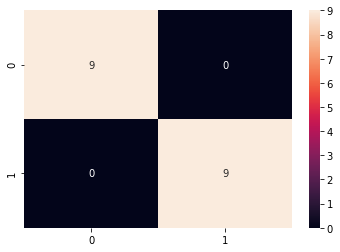

In [78]:
sns.heatmap(cm,annot=True);

In [96]:
image = tf.keras.preprocessing.image.load_img(r'covid_dataset/test/normal/NORMAL2-IM-1423-0001.jpeg' , target_size = (224,224))

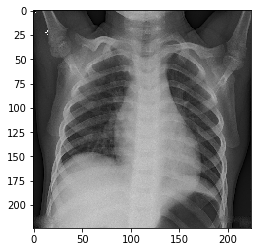

In [97]:
plt.imshow(image);

In [98]:
type(image)

PIL.Image.Image

In [99]:
image = tf.keras.preprocessing.image.img_to_array(image)
np.shape(image)

(224, 224, 3)

In [100]:
type(image)

numpy.ndarray

In [101]:
np.max(image) , np.min(image)

(255.0, 0.0)

In [102]:
image = np.expand_dims(image, axis = 0)
np.shape(image)

(1, 224, 224, 3)

In [103]:
image = tf.keras.applications.resnet50.preprocess_input(image)

In [104]:
np.max(image) , np.min(image)

(151.061, -123.68)

In [105]:
predictions = model.predict(image)
print(predictions)

[[3.4844808e-04 9.9965155e-01]]


In [106]:
predictions[0]

array([3.4844808e-04, 9.9965155e-01], dtype=float32)

In [107]:
np.argmax(predictions[0])

1

In [108]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [109]:
list(train_generator.class_indices)

['covid', 'normal']

In [110]:
prediction = list(train_generator.class_indices)[np.argmax(predictions[0])]
prediction

'normal'